#Extracting and reading the dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

csv_file_path = 'Global YouTube Statistics.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path, encoding='latin-1')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("First 5 rows")
print(df.head())
print("Last 5 rows")
print(df.tail())
print("Info")
print(df.info())


First 5 rows
   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series  245000000.0  2.280000e+11   
1     2              YouTube Movies  170000000.0  0.000000e+00   
2     3                     MrBeast  166000000.0  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes  162000000.0  1.640000e+11   
4     5                   SET India  159000000.0  1.480000e+11   

           category                       Title  uploads Country of origin  \
0             Music                    T-Series    20082             India   
1  Film & Animation               youtubemovies        1     United States   
2     Entertainment                     MrBeast      741     United States   
3         Education  Cocomelon - Nursery Rhymes      966     United States   
4             Shows                   SET India   116536             India   

         Country Abbreviation   channel_type  video_views_rank  country_rank  \
0          india           IN          Mu

#fixing data by managing empty spaces


In [3]:
# Check for null values in each column
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  3
video views                                  0
category                                    55
Title                                        0
uploads                                      0
Country of origin                          125
Country                                    125
Abbreviation                               125
channel_type                                32
video_views_rank                             1
country_rank                               119
channel_type_rank                           35
video_views_for_the_last_30_days            57
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               340
created_year                                 5
created_month

In [4]:
#remove rows with subscribers count null
df.dropna(subset=['subscribers'], inplace=True)

In [5]:
#remove country and abbreviation columns
df.drop(columns=['Country', 'Abbreviation'], inplace=True)

In [6]:
#replace null country of origin, created_month, created_year, created_date, category, channel_type, channel_type_rank, country_rank, video_views_rank with mode
df['channel_type_rank'].fillna(df['channel_type_rank'].mode()[0], inplace=True)
df['channel_type'].fillna(df['channel_type'].mode()[0], inplace=True)
df['country_rank'].fillna(df['country_rank'].mode()[0], inplace=True)
df['video_views_rank'].fillna(df['video_views_rank'].mode()[0], inplace=True)
df['category'].fillna(df['category'].mode()[0], inplace=True)
df['created_month'].fillna(df['created_month'].mode()[0], inplace=True)
df['created_year'].fillna(df['created_year'].mode()[0], inplace=True)
df['created_date'].fillna(df['created_date'].mode()[0], inplace=True)
df['Country of origin'].fillna(df['Country of origin'].mode()[0], inplace=True)

/tmp/ipython-input-6-3994425090.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['channel_type_rank'].fillna(df['channel_type_rank'].mode()[0], inplace=True)
/tmp/ipython-input-6-3994425090.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [7]:
#replace Gross tertiary education enrollment (%), Population, Unemployment rate, Urban_population null values with median/mean
df['Gross tertiary education enrollment (%)'].fillna(df['Gross tertiary education enrollment (%)'].median(), inplace=True)
df['Population'].fillna(df['Population'].mean(), inplace=True)
df['Unemployment rate'].fillna(df['Unemployment rate'].median(), inplace=True)
df['Urban_population'].fillna(df['Urban_population'].mean(), inplace=True)

/tmp/ipython-input-7-1897603806.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gross tertiary education enrollment (%)'].fillna(df['Gross tertiary education enrollment (%)'].median(), inplace=True)
/tmp/ipython-input-7-1897603806.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [8]:
#replace null latitude and longitude with mode
df['Latitude'].fillna(df['Latitude'].mode()[0], inplace=True)
df['Longitude'].fillna(df['Longitude'].mode()[0], inplace=True)

/tmp/ipython-input-8-1869450687.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Latitude'].fillna(df['Latitude'].mode()[0], inplace=True)
/tmp/ipython-input-8-1869450687.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [9]:
# recheck for null values in each column
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country of origin                            0
channel_type                                 0
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days            57
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               339
created_year                                 0
created_month                                0
created_date                                 0
Gross tertiar

#1.What are the top 10 YouTube channels based on the number of subscribers?

   rank                    Youtuber  subscribers
0     1                    T-Series  245000000.0
1     2              YouTube Movies  170000000.0
2     3                     MrBeast  166000000.0
3     4  Cocomelon - Nursery Rhymes  162000000.0
4     5                   SET India  159000000.0
5     6                       Music  119000000.0
6     7         ýýý Kids Diana Show  112000000.0
7     8                   PewDiePie  111000000.0
8     9                 Like Nastya  106000000.0
9    10               Vlad and Niki   98900000.0


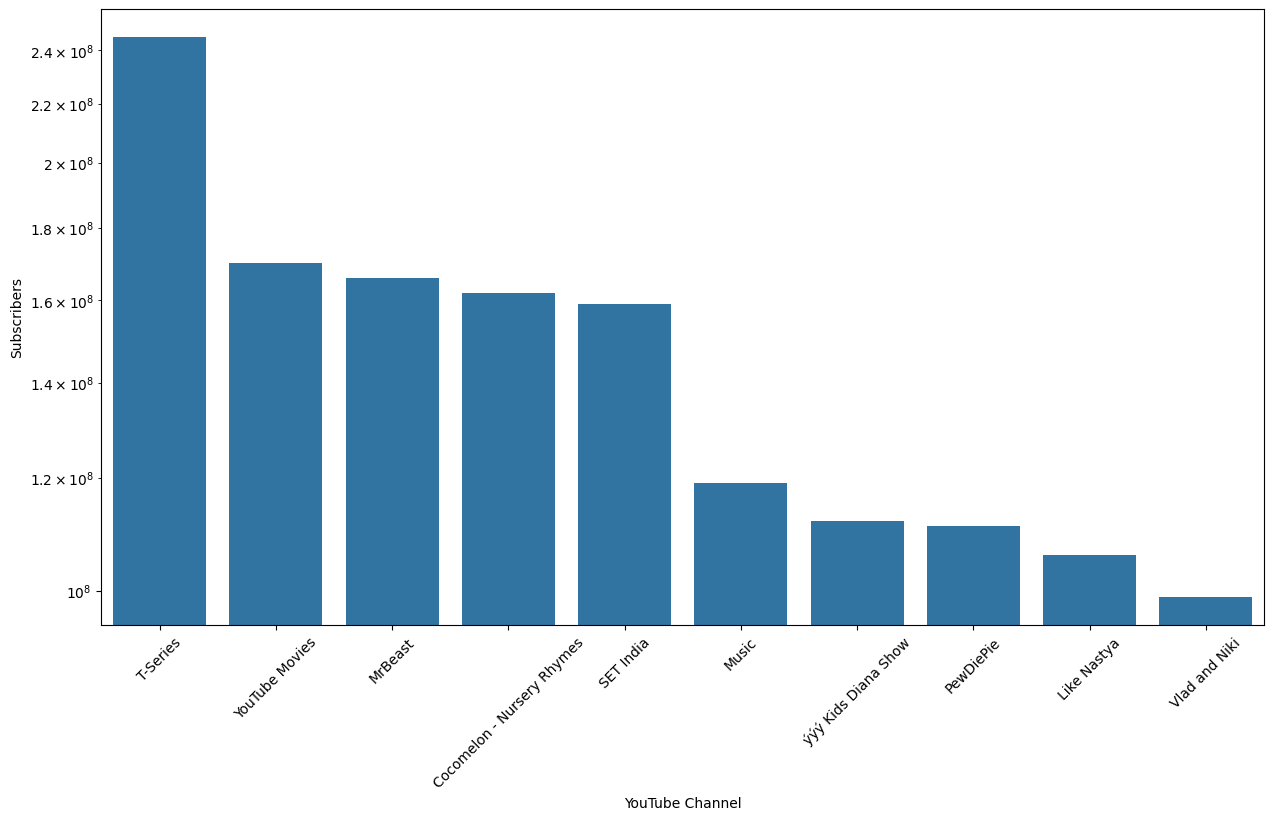

In [10]:
print(df[['rank','Youtuber', 'subscribers']].sort_values(by='rank').head(10))
plt.figure(figsize=(15, 8))
sns.barplot(x='Youtuber', y='subscribers', data=df.sort_values(by='rank').head(10))
plt.xticks(rotation=45)
plt.yscale('log')
plt.xlabel("YouTube Channel")
plt.ylabel("Subscribers")
plt.show()

#2.	Which category has the highest average number of subscribers?

In [11]:
avg_sub_cat = df.groupby('category')['subscribers'].mean()
cat = avg_sub_cat.idxmax()
avg_sub = avg_sub_cat.max()

print(f"Category with the highest average number of subscribers is {cat}, with average of {avg_sub:.2f} subscribers.")

Category with the highest average number of subscribers is Shows, with average of 41615384.62 subscribers.


#3.How many videos, on average, are uploaded by YouTube channels in each category?

In [12]:
avg_cat_vid=df.groupby('category')['uploads'].mean()
print(avg_cat_vid)

category
Autos & Vehicles           1550.666667
Comedy                     1202.557143
Education                  3087.086957
Entertainment              9969.650685
Film & Animation           2899.340909
Gaming                     4198.744681
Howto & Style              1695.500000
Movies                     3553.000000
Music                      2325.945813
News & Politics          112484.384615
Nonprofits & Activism    102912.000000
People & Blogs             9256.793893
Pets & Animals             3562.800000
Science & Technology       2114.058824
Shows                     27443.692308
Sports                    19129.833333
Trailers                   6839.000000
Travel & Events             766.000000
Name: uploads, dtype: float64


#4.What are the top 5 countries with the highest number of YouTube channels?

In [13]:
cont_yt_count=df.groupby('Country of origin')['Youtuber'].count()
print(cont_yt_count.sort_values(ascending=False).head(5))

Country of origin
United States     440
India             169
Brazil             62
United Kingdom     44
Mexico             33
Name: Youtuber, dtype: int64


#5.What is the distribution of channel types across different categories?

In [14]:
cat_channel_count=df.groupby('category')['channel_type'].value_counts()
print(cat_channel_count)

category               channel_type 
Autos & Vehicles       Autos              2
                       Entertainment      1
Comedy                 Comedy            39
                       Entertainment     22
                       People             5
                       Games              3
                       Film               1
Education              Education         36
                       Entertainment      3
                       People             3
                       Film               2
                       Games              2
Entertainment          Entertainment    195
                       Music             28
                       People            24
                       Games             18
                       Film               8
                       Education          6
                       Comedy             5
                       News               3
                       Tech               2
                       Autos           

#6.Is there a correlation between the number of subscribers and total video views for YouTube channels?

Correlation value is 0.7481786016237689
Moderate positive correlation


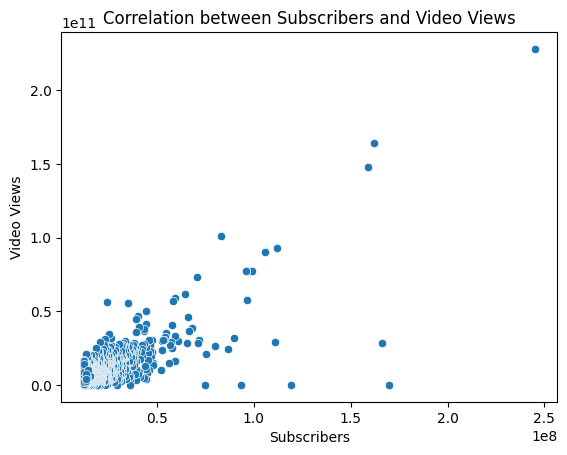

In [15]:
corr_val=df['subscribers'].corr(df['video views'])
print("Correlation value is",corr_val)
if (0.9<corr_val<=1):
  print("Strong positive correlation")
elif (0.7<corr_val<=0.9):
  print("Moderate positive correlation")
elif (0.5<corr_val<=0.7):
  print("Weak positive correlation")
elif (0.3<corr_val<=0.5):
  print("Weak positive correlation")
elif (-0.3<corr_val<=0.3):
  print("No correlation")
elif (-0.5<corr_val<=-0.3):
  print("Weak negative correlation")
elif (-0.7<corr_val<=-0.5):
  print("Moderate negative correlation")
elif (-0.9<corr_val<=-0.7):
  print("Strong negative correlation")
elif (corr_val>=-1):
  print("Strong negative correlation")

sns.scatterplot(x='subscribers', y='video views', data=df)
plt.title('Correlation between Subscribers and Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.show()

#7.How do the monthly earnings vary throughout different categories?

In [16]:
lmon_earn_cat=df.groupby('category')['lowest_monthly_earnings']
hmon_earn_cat=df.groupby('category')['highest_monthly_earnings']
me_cat=pd.concat([lmon_earn_cat.min(),hmon_earn_cat.max()],axis=1)
me_cat.columns=['Lowest earnings','Highest earnings']
print(me_cat)

                       Lowest earnings  Highest earnings
category                                                
Autos & Vehicles               48300.0         1400000.0
Comedy                             0.0         5000000.0
Education                          0.0         7900000.0
Entertainment                      0.0        13600000.0
Film & Animation                   0.0         9200000.0
Gaming                             0.0         4300000.0
Howto & Style                      0.0         2000000.0
Movies                             0.0          909400.0
Music                              0.0         9000000.0
News & Politics                    0.0         1800000.0
Nonprofits & Activism          11400.0          598200.0
People & Blogs                     0.0         5500000.0
Pets & Animals                     0.0         3000000.0
Science & Technology               0.0          670800.0
Shows                              0.0         7300000.0
Sports                         

#8.What is the overall trend in subscribers gained in the last 30 days across all channels?

Mean of subscribers gained in the last 30 days is 350293.48
Median of subscribers gained in the last 30 days is 200000.00
Mode of subscribers gained in the last 30 days is 100000.00


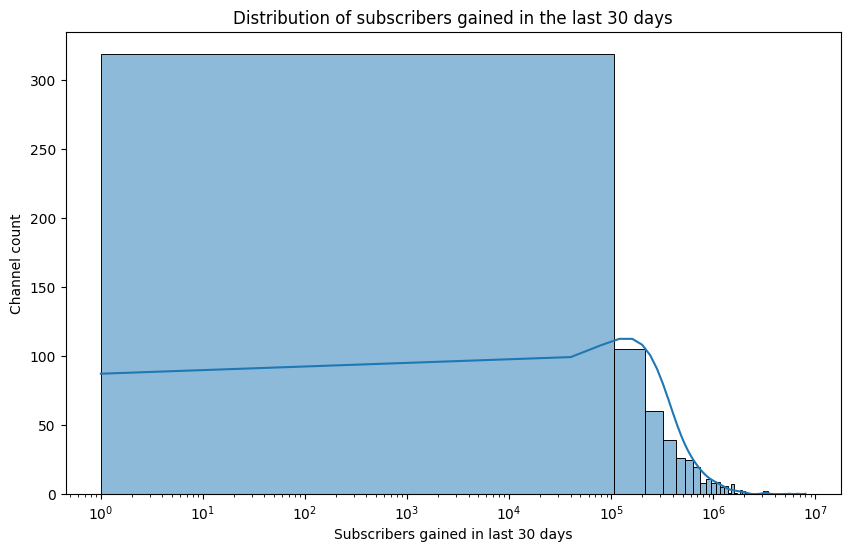

In [17]:
sub_30=df['subscribers_for_last_30_days']
print(f"Mean of subscribers gained in the last 30 days is {sub_30.mean():.2f}")
print(f"Median of subscribers gained in the last 30 days is {sub_30.median():.2f}")
print(f"Mode of subscribers gained in the last 30 days is {sub_30.mode()[0]:.2f}")
plt.figure(figsize=(10,6))
sns.histplot(sub_30,bins=75,kde=True)
plt.title("Distribution of subscribers gained in the last 30 days")
plt.xlabel("Subscribers gained in last 30 days")
plt.ylabel("Channel count")
plt.xscale('log')
plt.show()

#9.Are there any outliers in terms of yearly earnings from YouTube channels?

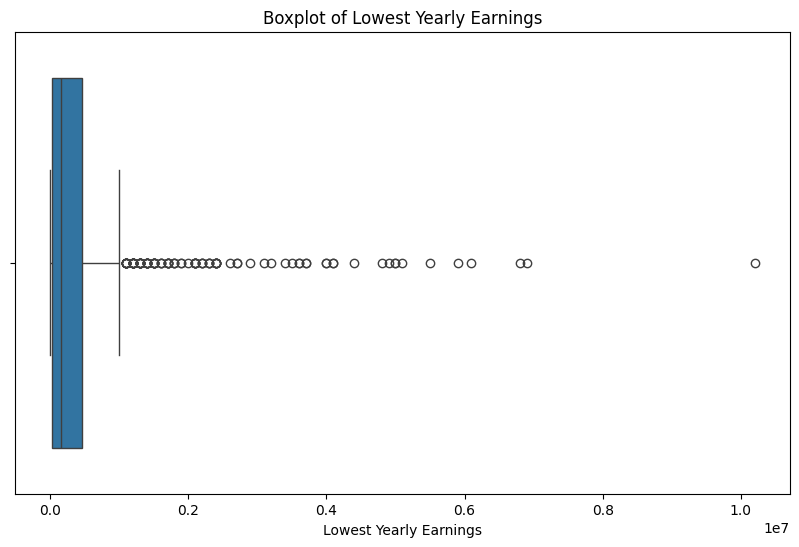

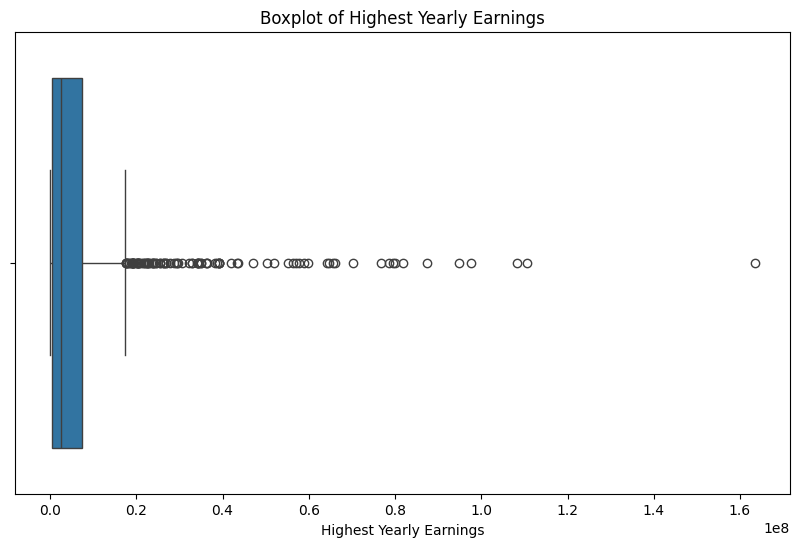

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['lowest_yearly_earnings'])
plt.title('Boxplot of Lowest Yearly Earnings')
plt.xlabel('Lowest Yearly Earnings')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['highest_yearly_earnings'])
plt.title('Boxplot of Highest Yearly Earnings')
plt.xlabel('Highest Yearly Earnings')
plt.show()

#10.What is the distribution of channel creation dates? Is there any trend over time?

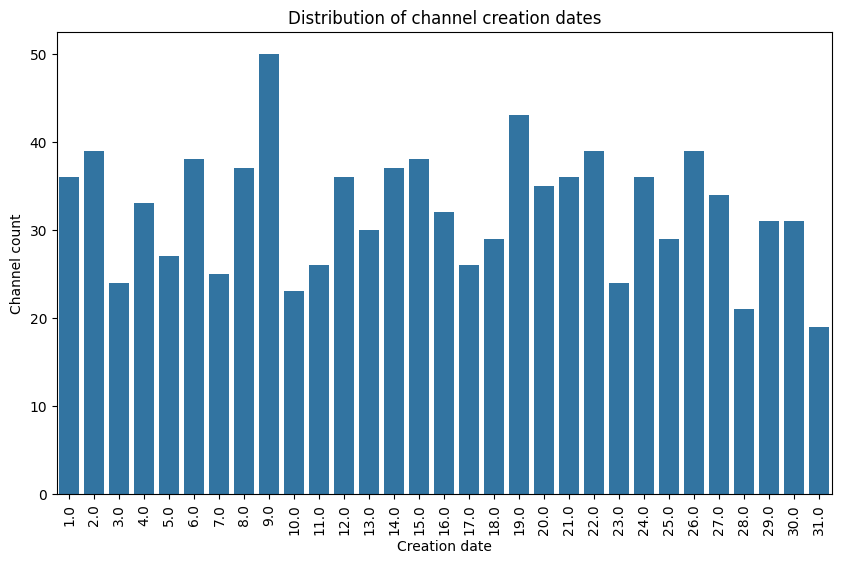

In [19]:
cr_dt=df['created_date']
plt.figure(figsize=(10, 6))
sns.countplot(x=cr_dt)
plt.title("Distribution of channel creation dates")
plt.xlabel("Creation date")
plt.xticks(rotation=90)
plt.ylabel("Channel count")
plt.show()

#11.Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?

In [20]:
ed_chan=df.groupby('Country of origin')['Gross tertiary education enrollment (%)']
print(ed_chan.value_counts())

Country of origin     Gross tertiary education enrollment (%)
Afghanistan           9.7                                          1
Andorra               68.0                                         1
Argentina             90.0                                        13
Australia             113.1                                        9
Bangladesh            20.6                                         1
Barbados              65.4                                         1
Brazil                51.3                                        62
Canada                68.9                                        14
Chile                 88.5                                         3
China                 50.6                                         1
Colombia              55.3                                        11
Cuba                  41.4                                         1
Ecuador               44.9                                         2
Egypt                 35.2               

#12.How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?

Top 10 countries by channel count, their channel counts, and average unemployment rates:
                   Channel Count  Average Unemployment Rate
Country of origin                                          
United States                440                  13.046591
India                        169                   5.360000
Brazil                        62                  12.080000
United Kingdom                44                   3.850000
Mexico                        33                   3.420000
Indonesia                     28                   4.690000
Spain                         21                  13.960000
Thailand                      18                   0.750000
South Korea                   17                   4.150000
Russia                        16                   4.590000


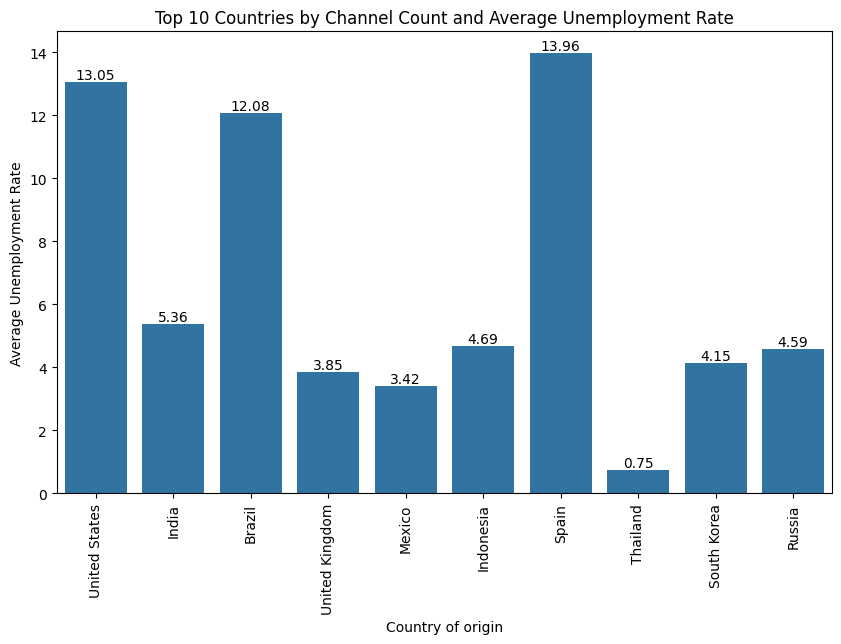

In [21]:
con_yt=df.groupby('Country of origin')['Youtuber'].count()
con_yt=con_yt.sort_values(ascending=False).head(10)
top_10_countries = con_yt.index.tolist()
df_top_countries = df[df['Country of origin'].isin(top_10_countries)].copy()
unemployment_rates = df_top_countries.groupby('Country of origin')['Unemployment rate'].mean()
summary_df = pd.DataFrame({
    'Channel Count': con_yt.loc[top_10_countries],
    'Average Unemployment Rate': unemployment_rates.loc[top_10_countries]
})
summary_df = summary_df.sort_values(by='Channel Count', ascending=False)

print("Top 10 countries by channel count, their channel counts, and average unemployment rates:")
print(summary_df)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=summary_df, x='Country of origin', y='Average Unemployment Rate')
plt.xlabel('Country of origin')
plt.xticks(rotation=90)
plt.ylabel('Average Unemployment Rate')
plt.title('Top 10 Countries by Channel Count and Average Unemployment Rate')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.show()

#13.What is the average urban population percentage in countries with YouTube channels?

In [22]:
urb_pop_avg=df.groupby('Country of origin')['Urban_population'].mean()
print(urb_pop_avg)

Country of origin
Afghanistan             9.797273e+06
Andorra                 2.241256e+08
Argentina               4.133957e+07
Australia               2.184476e+07
Bangladesh              6.098742e+07
Barbados                8.943100e+04
Brazil                  1.832416e+08
Canada                  3.062848e+07
Chile                   1.661014e+07
China                   8.429340e+08
Colombia                4.082730e+07
Cuba                    8.739135e+06
Ecuador                 1.111671e+07
Egypt                   4.289582e+07
El Salvador             4.694702e+06
Finland                 4.716888e+06
France                  5.412336e+07
Germany                 6.432484e+07
India                   4.710315e+08
Indonesia               1.515097e+08
Iraq                    2.778337e+07
Italy                   4.265197e+07
Japan                   1.157824e+08
Jordan                  9.213048e+06
Kuwait                  4.207083e+06
Latvia                  1.304943e+06
Malaysia            

#14.Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?

In [23]:
lat_long=df.groupby(['Latitude','Longitude'])['Youtuber'].count()
print(lat_long.sort_values(ascending=False))

Latitude    Longitude  
 37.090240  -95.712891     441
 20.593684   78.962880     169
-14.235004  -51.925280      62
 55.378051  -3.435973       44
 23.634501  -102.552784     33
-0.789275    113.921327     28
 40.463667  -3.749220       21
 15.870032   100.992541     18
 35.907757   127.766922     17
 61.524010   105.318756     16
 56.130366  -106.346771     14
-38.416097  -63.616672      13
 12.879721   121.774017     12
 4.570868   -74.297333      11
 23.885942   45.079162      10
-25.274398   133.775136      9
 48.379433   31.165580       8
 23.424076   53.847818       8
 30.375321   69.345116       6
 51.165691   10.451526       6
 36.204824   138.252924      5
 46.227638   2.213749        5
 38.963745   35.243322       4
 60.128161   18.643501       4
 1.352083    103.819836      4
-35.675147  -71.542969       3
 30.585164   36.238414       3
 52.132633   5.291266        3
 14.058324   108.277199      3
 41.871940   12.567380       2
-1.831239   -78.183406       2
 26.820553   30

#15.What is the correlation between the number of subscribers and the population of a country?

Correlation value is 0.36032267675231566
Weak positive correlation


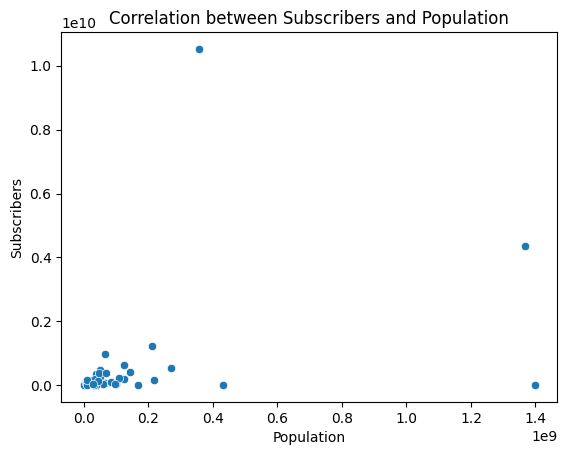

In [24]:
sub_con=df.groupby('Country of origin')['subscribers'].sum()
# print(sub_con.sort_values(ascending=False))
pop_con=df.groupby('Country of origin')['Population'].mean()
# print(pop_con.sort_values(ascending=False))
corr_val=sub_con.corr(pop_con)
print("Correlation value is",corr_val)
if (0.9<corr_val<=1):
  print("Strong positive correlation")
elif (0.7<corr_val<=0.9):
  print("Moderate positive correlation")
elif (0.5<corr_val<=0.7):
  print("Weak positive correlation")
elif (0.3<corr_val<=0.5):
  print("Weak positive correlation")
elif (-0.3<corr_val<=0.3):
  print("No correlation")
elif (-0.5<corr_val<=-0.3):
  print("Weak negative correlation")
elif (-0.7<corr_val<=-0.5):
  print("Moderate negative correlation")
elif (-0.9<corr_val<=-0.7):
  print("Strong negative correlation")
elif (corr_val>=-1):
  print("Strong negative correlation")

sns.scatterplot(x=pop_con, y=sub_con)
plt.title('Correlation between Subscribers and Population')
plt.xlabel('Population')
plt.ylabel('Subscribers')
plt.show()

#16.How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?

In [25]:
popcc = df_top_countries.groupby('Country of origin')['Population'].mean()
popcc_df = pd.DataFrame({
    'Channel Count': con_yt.loc[top_10_countries],
    'Population': popcc.loc[top_10_countries]
})
popcc_df = popcc_df.sort_values(by='Channel Count', ascending=False)
print(popcc_df)

                   Channel Count    Population
Country of origin                             
United States                440  3.572275e+08
India                        169  1.366418e+09
Brazil                        62  2.125594e+08
United Kingdom                44  6.683440e+07
Mexico                        33  1.260140e+08
Indonesia                     28  2.702039e+08
Spain                         21  4.707678e+07
Thailand                      18  6.962558e+07
South Korea                   17  5.170910e+07
Russia                        16  1.443735e+08


#17.Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?

In [26]:
sub_30_by_country = df.groupby('Country of origin')['subscribers_for_last_30_days'].sum()
unemployment_rates_by_country = df.groupby('Country of origin')['Unemployment rate'].mean()
aligned_data = pd.concat([sub_30_by_country, unemployment_rates_by_country], axis=1).dropna()

corr_val = aligned_data['subscribers_for_last_30_days'].corr(aligned_data['Unemployment rate'])

print("Correlation value is",corr_val)
if (0.9<corr_val<=1):
  print("Strong positive correlation")
elif (0.7<corr_val<=0.9):
  print("Moderate positive correlation")
elif (0.5<corr_val<=0.7):
  print("Weak positive correlation")
elif (0.3<corr_val<=0.5):
  print("Weak positive correlation")
elif (-0.3<corr_val<=0.3):
  print("No correlation")
elif (-0.5<corr_val<=-0.3):
  print("Weak negative correlation")
elif (-0.7<corr_val<=-0.5):
  print("Moderate negative correlation")
elif (-0.9<corr_val<=-0.7):
  print("Strong negative correlation")
elif (corr_val>=-1):
  print("Strong negative correlation")

Correlation value is 0.1809092889305874
No correlation


#18.How does the distribution of video views for the last 30 days vary across different channel types?

/tmp/ipython-input-27-1037909825.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vv30_type['video_views_for_the_last_30_days'].fillna(vv30_type['video_views_for_the_last_30_days'].median(), inplace=True)


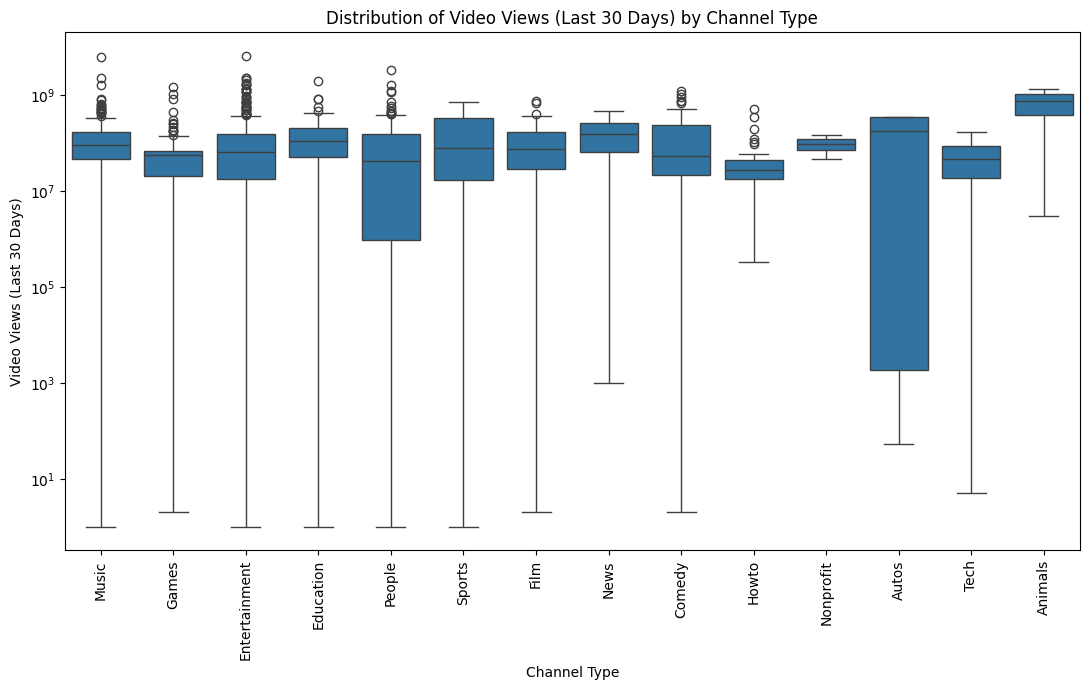

In [27]:
# Handle missing values in 'video_views_for_the_last_30_days' before plotting
vv30_type=df
vv30_type['video_views_for_the_last_30_days'].fillna(vv30_type['video_views_for_the_last_30_days'].median(), inplace=True)

plt.figure(figsize=(11, 7))
sns.boxplot(x='channel_type', y='video_views_for_the_last_30_days', data=vv30_type)
plt.title('Distribution of Video Views (Last 30 Days) by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Video Views (Last 30 Days)')
plt.xticks(rotation=90)
plt.yscale('log') # Use log scale due to wide range of video views
plt.tight_layout()
plt.show()

#19.Are there any seasonal trends in the number of videos uploaded by YouTube channels?

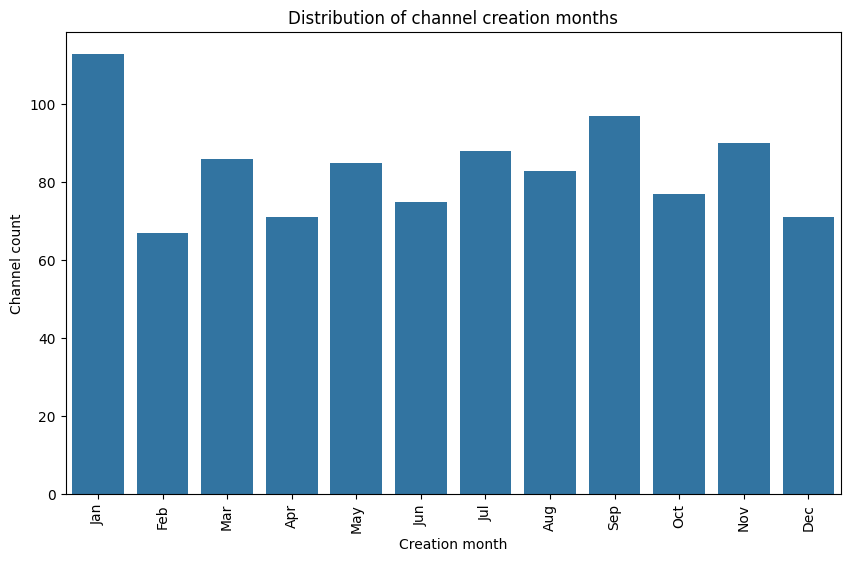

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='created_month', data=df, order=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.title("Distribution of channel creation months")
plt.xlabel("Creation month")
plt.xticks(rotation=90)
plt.ylabel("Channel count")
plt.show()

#20.What is the average number of subscribers gained per month since the creation of YouTube channels till now?

In [29]:
avg_sub_month=df.groupby('created_month')['subscribers_for_last_30_days'].mean()
avg_sub_month=avg_sub_month.sort_values(ascending=False)
avg_sub_month=avg_sub_month.reset_index()
avg_sub_month.columns=['Created Month','Average Subscribers']
print(avg_sub_month)

   Created Month  Average Subscribers
0            Feb        440220.916667
1            Jun        439813.754717
2            Sep        425838.758065
3            Jul        420340.372881
4            Dec        416707.142857
5            Mar        367815.046875
6            Oct        343139.235294
7            Apr        297675.395349
8            Aug        294233.807692
9            Nov        286275.844828
10           Jan        263064.890411
11           May        245799.254237
